In this lab we will see how easy it is to use common algorithms and functions in the Python package for machine learning, [scikit-learn](http://scikit-learn.org/stable/). We will also learn how to visualize our data and results using [Matplotlib](http://matplotlib.org/).

In general, it is useful to check if your algorithm is already implemented in a widely used library, as code in official libraries is well maintained, relatively fast, diligently tested, and has been applied numerous times by researches all over the world. Even in cases where you need to implement your own algorithm it is good to use an implementation of one of the common packages as a reference, or a first baseline.

Before we get started, let's import NumPy and Matplotlib and set the plotting options for our notebook to plot *inside* of our Jupyter notebook (the `%matplotlib inline` magic is only used in IPython/Jupyter notebooks). 

In [37]:
#IPython magic to plot inside the Jupyter notebook
%matplotlib inline 
import numpy as np #numpy is commonly imported as np
import matplotlib.pyplot as plt #pyplot is usually imported as plt

## Plotting with Matplotlib

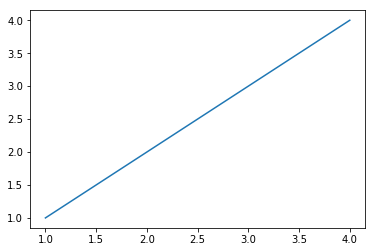

In [38]:
plt.plot([1,2,3,4], [1,2,3,4])

As you can see it is very easy to generate (simple) plots in Matplotlib. Matplotlib `pyplot` gives us two ways to define plots:

- In Matlab style
- Object-oriented plotting

### Plotting in Matlab style

The plot above was generated using the `plot()` command. Using the `plot()` command follows the same structure as generating plots in Matlab (initially the aim of the creators of Matplotlib was to emulate Matlabs plotting capabilities).

Following this style we create plots by a succession of plotting functions. Each function changes the figure element. The `plot()` environment takes care of maintaining the reference to the figure and previous changes. The `plot()` functionality also comes with useful defaults for your inputs. For example, we can generate a plot like so:

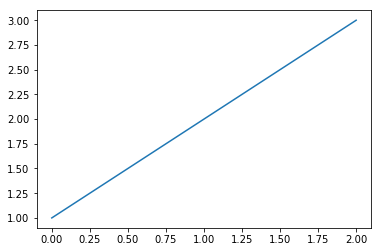

In [39]:
plt.plot([1,2,3])

How did Matplotlib plot this data, given that we only specified one list of elements? 
If you only provide a single list, the `plot()` command assumes that this list are *y-values* and sets the *x-values* to be the `range(0-length(y)`.

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
What are the x-values that Matplotlib assumed for the plot `plt.plot([1,2,3])`?
</div>


###  Plotting in object-oriented fashion

Defining your plots as a *succession* of commands is easy and convenient for simple and standard plots - for more complicated plots, or if you need to have more control about the plotting options, Matplotlib provides a second way to define plots - Object-oriented plotting. Let's see an example for the same plot in object-oriented fashion:

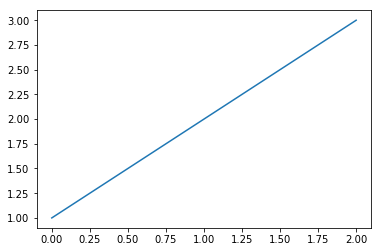

In [40]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.plot([1,2,3])

As you can see, the only difference is that we define the figure object and the axes explicitly. However, these explicit references to the figure and axes allow us a finer control of the figure characteristics. In this lab and the following labs and exercises you can use any of the two plotting commands.


<div class="alert alert-warning">
    <strong>Warning!</strong> The term axes in Matplotlib should not be confused with the mathematical term - **in Matplotlib axes are parts of a figure**.
</div>

For the functions, f1 and f2 and the domain x:

```
    x = np.linspace(0,1,250)
    def f1(x):
        return np.sin(x) + 0.3 * np.random.randn(250)
    def f2(x):
        return np.cos(x) + 0.3 * np.random.randn(250)

```

<div class="alert alert-info" role="alert">

<h1>Exercises</h1>
<ol>
<li>Plot `f1()` against x.</li>
<li>Plot both `f1()` and `f2()` in the same figure.</li>
<li>Change the colors of the plots.</li>
<li>Change the style of the lines. Check the `linestyle` parameter</li>
<li>Label `f1` as "sine-f1" and `f2` as "cosine-f2" and add a label. Check `plt.legend()` and the `label` parameter.</li>
<li>Can you plot the means of `f1` and `f2` in a barplot? Check `plt.bar`.</li>
<li>Can you add the standard deviation (SD) to the barplot? Check the `yerr` parameter of `plt.bar`.</li>
</ol>
</div>


In [41]:
x = np.linspace(0,1,250)
def f1(x):
    return np.sin(x) + 0.3 * np.random.randn(250)
def f2(x):
    return np.cos(x) + 0.3 * np.random.randn(250)

TypeError: legend() missing 2 required positional arguments: 'handles' and 'labels'

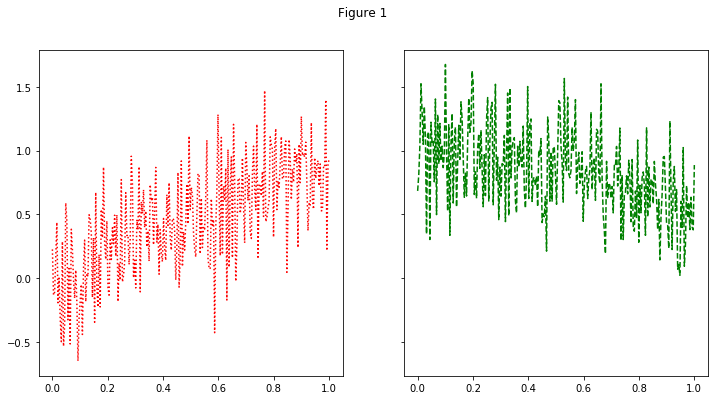

In [42]:
f,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
ax1.plot(x, f1(x), "r", ls=":", label="sine-f1")
ax2.plot(x, f2(x), "g", ls="--", label="cosine-f2")
f.suptitle("Figure 1")
f.legend(fontsize="large", loc="upper right")

In [ ]:
mf1 = np.mean(f1(x))
mf2 = np.mean(f2(x))

SDmf1 = np.std(f1(x))
SDmf2 = np.std(f2(x))

labels = ["sine-f1", "cosine-f2"]

f,ax = plt.subplots(figsize=(12,6))
ax.bar(labels, [mf1, mf2], yerr= [SDmf1, SDmf2])

## Multiple plots

Often you might want to display multiple plots in one shared figure - for example to contrast two results or datasets.
We can use `subplots` to generate several axes of a figure and then create plots for each of the axes individually, just as we did before.
Again, `matplotlib` offers two ways to define subplots - object oriented or in Matlab style.

If we create the subplots in object-oriented fashion we use `plt.subplots()` and specify the number of columns and rows. `plt.subplots` returns a tuple - the figure object and the axes. If more than one row or column is specified, axes is an array of `(ncol, nrow)` dimensions.

We can then access the subplot axes by indexing them directly with `axes[ncol,nrow]`. Then we can plot on that specific axis as before.

In [ ]:
figure, axes = plt.subplots(ncols=2, nrows=3, figsize = (16,12))
axes[1,0].plot(np.linspace(0,1,100), np.sin(np.pi * 2.5 * np.linspace(0,1,100)))

Alternatively, we can also create subplots using Matlab-style commands:

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(321)
plt.subplot(322)

plt.subplot(323)
plt.plot(np.linspace(0,1,100), np.sin(np.pi * 2.5 * np.linspace(0,1,100)))

plt.subplot(324)
plt.subplot(325)
plt.subplot(326)

Notice how we specify the number of rows and columns of the figure with `plt.subplot(rows column index)`, and how the plotting command `plt.plot` uses the last subplot created (the line just before calling `plt.plot`) as axis.

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Make sure that you understand what `plt.subplot()` does.</li>
<li>What does `plt.subplot(1,2,1)` or (1,2,2) correspond to?</li>
<li>Create a figure with 4 subplots: 2 rows and 2 columns.</li>
<li>Have a look at the documentation on how you can create subplots sharing x or/and y axes.</li>
</ol>
</div>


Matplotlib gives us a large number of plotting functions, as well as methods to style and label our figures.
Have a look at the [Gallery of plots](http://matplotlib.org/gallery.html) to get an idea about the possibilities. 

We will not go through all the options here, but will introduce specific plots as we need them. 

# Scikit-Learn

Scikit-learn is a machine learning library build upon NumPy. It provides many of the commonly used machine learning algorithms and datasets. It is a great library to explore algorithms, as it is very well documented and large numbers of examples exists.

Scikit-learn is used in the first exercise for this course and the relevant functions for this exercises will be provided in the exercise sheet. Here we will only have a quick look at how we can define, train and use a model in scikit-learn. As an example model we will look at linear regression.

Right now scikit-learn might not be installed on your anaconda virtual environment. We can install it using ``conda install scikit-learn`` in a terminal with your virtual environment activated. You will need to rerun this notebook to update your notebook after installation.

After installing you should be able to import the datasets module from scikit-learn with:

In [ ]:
from sklearn import datasets

Before we can start we will need data so that we can analyze it. Scikit-learn already comes with a set of common datasets and functionality to generate synthetic dataset. These datasets and functions are a convenient way to benchmark your algorithms and explore and learn strengths and weaknesses of common learning algorithms.

Since we will look at regression, we will use a classic dataset for regression: the Boston house-price datasets. In this dataset we get a number of numeric features (values that we will use to predict another quantity, in this case the house price). We want to train a model to learn a relationship between these features and the target value (house price). 

Before we have a look at that dataset, let's see a *simpler case with only one feature*. As discussed, we can generate *synthetic data* using:

In [ ]:
X, y = datasets.make_regression(n_samples=250, n_features=1, noise=5.5)

<div class="alert alert-info" role="alert">
Before applying some model to data, it is always a good idea to plot the data and have a look at some data characteristics.

<h1>Exercises</h1>
<ol>
<li> Plot the data $X,y$ as a scatterplot.</li>
</ol>
</div>

In [ ]:
plt.scatter(X,y)

Interacting with scikit-learn always follows the same 3 steps:

1. First we define a model.
2. Then we learn/fit the model parameters.
3. Finally we can use the model (predict new values or inspect the learned parameters, etc.).

Let's see how this goes for our linear regression. Here we will use the most simple linear regression [Ordinary Least Squares Regression (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares).

In OLS we assume a linear model of the form:

$$ y = w_{0} + w_{1} * x_{1} + \dots + w_{n} * x_{n} $$ where $w_0$ is the *intercept* and $w_{1-n}$ are called *coefficients* (or weights).


The $x_{1-n}$ are the individual features in $X$, $y$ is the value we want to predict with our data.

We can define this model in scikit-learn like this:

In [ ]:
from sklearn import linear_model

In [ ]:
olsModel = linear_model.LinearRegression()

### Learning the coefficients

In the second step, we learn the coefficients of our model ($w_i$) from our data. *How* we learn the parameters differs from model to model - for standard OLS we learn the coefficients by *minimizing* the sum of squares *between the true y and the prediction of our model*.

In scikit-learn we learn the parameters of the defined models by calling `.train()` and specifying the training data $X$, containing all observed values, as well as $y$, the value to be predicted.

In [ ]:
olsModel.fit(X,y)

That's it! You might be surprised by not getting an output result - thats because all models in scikit-learn store the learned parameters inside the model object. We can access the learned coefficient(s) using:

In [ ]:
olsModel.coef_

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Use the OLS model to predict the values for `x_test`. Use `olsModel.predict()`</li>
<li>What does the `[:,None]` do and why is it necessary? Hint1: This is equivalent to `[:, np.newaxis]`. Hint2: Remember linear algebra and notice that `X` is captitalized while `y` is not!</li>
<li>Plot both the true data and your prediction.</li>
</ol>
</div>

In [ ]:
x_test = np.linspace(-1,1, 250)[:,None]

In [ ]:
preditictions = olsModel.predict(x_test)

In [ ]:
plt.scatter(X,y,  label="true")
plt.scatter(x_test, prediticitons, label="predictions")
plt.legend()

## Boston Houseprices

To finish this lab, let's apply the OLS model to a real dataset. First let's import the data directly from scikit-learn.



In [ ]:
houseprices = datasets.load_boston()

The data in `sklearn.datasets` is already nicely formatted (in most real datasets you will spend considerable time cleaning the data or fixing recording problems). The datasets contain:

- A verbal description of the dataset.
- The feature names.
- The data ($X$)
- The target ($y$)

Let's start by having a look at the data description:

In [ ]:
print(houseprices.DESCR)

This contains a lot of information - right now we only really care about the features (Attribute Information). We can access these features by:

In [ ]:
houseprices.feature_names

Target contains the target values (in this case in thousands of dollars).


<div class="alert alert-info" role="alert">

<h1>Exercises</h1>
<ol>
<li>Check that the data contains all information included in the dataset description (Number of Instances: 506, Number of Attributes: 13).</li>
<li>What is the lowest price for a house? What is the highest? What is the mean? What is the SD?</li>
<li>Setup the OLS model and fit the data.</li>
<li>What are the coefficients for your model?</li>
<li>What do the coefficients mean? How would you predict a house price given this model?</li>
</ol>
</div>


In [ ]:
np.shape(houseprices.data)

The prices are in the target:

In [ ]:
np.min(houseprices.target)

In [ ]:
np.max(houseprices.target)

In [ ]:
np.mean(houseprices.target)

In [ ]:
np.std(houseprices.target)

We can visualize these using a histogram:

In [ ]:
plt.hist(houseprices.target)
plt.title("House prices (in 1000 $)")

OLS model:

In [ ]:
house_features = houseprices.data

In [ ]:
house_price = houseprices.target

In [ ]:
olsModelHouses = linear_model.LinearRegression()

Fitting the model:

In [ ]:
olsModelHouses.fit(house_features,house_price)

Printing all coefficients of the fitted model with the name of the coefficient.

In [ ]:
for ols_coeff, feature in zip(houseprices.feature_names,olsModelHouses.coef_):
    print('Feature coefficient {}: {}'.format(feature,ols_coeff))

We won't get into the details if this is a good model (it's not) and how we can assess how good it does and improve it - the main idea of this lab is to show how to define models, train on some data and use the learned parameters to predict new data.

# References:

Most examples in this lab are based on this [excellent course on SciPy, NumPy and Matplotlib](http://www.scipy-lectures.org/). 

Scikit-learn has great [tutorials](http://scikit-learn.org/stable/tutorial/index.html) and very good [documentation](http://scikit-learn.org/stable/user_guide.html). Check also their [algorithm cheatsheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

Scipy also has an excellent [Tutorial](https://docs.scipy.org/doc/scipy/reference/). 

Finally, there is loads of great video presentations and tutorials on scikit-learn, SciPy, NumPy and Matplotlib online (check for PyCon, SciPy Conference etc.).
